# Predicción de Revenue en Películas usando Machine Learning

## I. Introducción

### Contexto del problema a resolver y justificación de la necesidad
El éxito financiero de una película es un aspecto crítico en la industria cinematográfica. La capacidad de predecir el revenue (ingresos) de una película antes de su lanzamiento puede ser invaluable para productores, estudios y analistas de mercado. Con el crecimiento de los datos disponibles, es posible aplicar técnicas de machine learning para hacer predicciones más precisas basadas en características conocidas de las películas.

### Objetivos y alcance del proyecto
El objetivo de este proyecto es desarrollar un modelo predictivo que pueda estimar el revenue de las películas basado en diversas características como el presupuesto, el género, la popularidad u otras variables que considere importantes. El alcance del proyecto incluye la limpieza y preparación de los datos, el análisis exploratorio de los datos (EDA), el entrenamiento y evaluación de varios modelos de machine learning, y la selección del mejor modelo para realizar las predicciones.

## II. Dataset

### Descripción del dataset utilizado
El dataset utilizado para este proyecto proviene de https://www.themoviedb.org/. Contiene información sobre 3000 películas, con un total de 23 variables que incluyen:

- **id**: Identificador único de cada película (entero).
- **belongs_to_collection**: Contiene el Id de TMDB, nombre, póster de la película y URL de fondo en formato JSON. Puedes ver el póster y la imagen de fondo así: `https://image.tmdb.org/t/p/original/`. Ejemplo: `https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg`.
- **budget**: Presupuesto de una película en dólares. Valores de 0 significan desconocidos.
- **genres**: Contiene todos los nombres de géneros y el Id de TMDB en formato JSON.
- **homepage**: Contiene la URL de la página oficial de una película. Ejemplo: `http://sonyclassics.com/whiplash/` (esta es la página de la película Whiplash).
- **imdb_id**: Id de IMDB de una película (cadena). Puedes visitar la página de IMDB así: `https://www.imdb.com/title/`.
- **original_language**: Código de dos letras del idioma original en el que se hizo la película. Ejemplo: `en = inglés`, `fr = francés`.
- **original_title**: Título original de una película. El título y el título original pueden diferir si el título original no está en inglés.
- **overview**: Breve descripción de la película.
- **popularity**: Popularidad de la película en formato float.
- **poster_path**: Ruta del póster de una película. Puedes ver la imagen completa así: `https://image.tmdb.org/t/p/original/`.
- **production_companies**: Todos los nombres de las compañías de producción y el Id de TMDB en formato JSON de una película.
- **production_countries**: Código de dos letras y nombre completo del país de producción en formato JSON.
- **release_date**: Fecha de lanzamiento de una película en formato `mm/dd/yy`.
- **runtime**: Duración total de una película en minutos (entero).
- **spoken_languages**: Código de dos letras y nombre completo del idioma hablado en la película.
- **status**: Estado de la película, si está lanzada o es un rumor.
- **tagline**: Lema de la película.
- **title**: Título en inglés de una película.
- **Keywords**: Id de TMDB y nombre de todas las palabras clave en formato JSON.
- **cast**: Todos los Id de TMDB del reparto, nombre, nombre del personaje, género (1 = Femenino, 2 = Masculino) en formato JSON.
- **crew**: Nombre, Id de TMDB, ruta de perfil de varios miembros del equipo como Director, Escritor, Arte, Sonido, etc.
- **revenue**: Ingresos totales obtenidos por una película en dólares.

### Análisis exploratorio de los datos (EDA)
Durante el EDA, se realizaron las siguientes observaciones y análisis:
- Distribución de los ingresos de las películas
- Relación entre el presupuesto y el revenue
- Análisis de correlación entre las variables
- Distribución de películas por género
- Correlación entre variables numéricas



## III. Preprocesamiento de los datos

### Verificación de la calidad de los datos
Se identificaron y abordaron los siguientes problemas de calidad de datos:
- Variables en formato JSON
- Muchos nulos en algunas variables, pero resulta que no tienen mucha correlación con la variable a predecir.
- Datos erróneos en el budget y en el revenue de varias peliculas. Las correcciones las proporcionaban en los comentarios del dataset.
- Valores de 0 en el revenue, algo atípico. 


### Decisiones, imputaciones y transformación de variables
Se tomaron las siguientes decisiones y acciones:
- Para las variables en formato JSON, decidí implementar una función para pasarlos a nominales
- Para los valores nulos en las variables nominales, las pase a none. 
- Creación de nuevas variables derivadas para mejorar el modelo
- Para los valores 0 en revenue, conseguir la media de la columna y cubrirlos con la data sintética.

## IV. Modelado

### Entrenamiento de modelos supervisados
Se entrenaron y evaluaron los siguientes modelos:
1. **Regresión Lineal**
   - Resultados:
     - **MAE**: 58,284,982.69
     - **RMSE**: 90,421,474.11
     - **Regression Score (R²)**: 0.5138
     - **Regression Coefficient**: 2.8961

### Análisis e Interpretación de los Resultados

#### Regresión Lineal
El modelo trata de predecir el revenue con la variable budget, que es la variable con más correlación.

- **MAE (Mean Absolute Error)**: Un MAE de aproximadamente 58 millones indica que, en promedio, las predicciones del modelo están desviadas del valor real en unos 58 millones de dólares. 
- **RMSE (Root Mean Squared Error)**: Un RMSE de aproximadamente 90 millones refuerza la idea de que las predicciones del modelo tienen un error significativo. 
- **Regression Coefficient**: El coeficiente de regresión de 2.8961 sugiere que hay una pendiente positiva en la relación entre las características de entrada y el revenue.

#### Conclusión
El modelo de Regresión Lineal, aunque proporciona una base inicial para entender las relaciones entre las características de las películas y su revenue, muestra unos resultados malísimos teniendo en cuenta el MAE y RMSE que sugiere que el modelo no captura bien la complejidad de los datos. Esto nos indica que tenemos que usar un modelo más complejo para conseguir una predicción buena.

2. **Random Forest**
   - Resultados:
     - **MAE RF**: 1.3297
     - **RMSE RF**: 1.9283
     - **MAPE RF**: 11.3254

### Análisis e Interpretación de los Resultados


- **MAE (Mean Absolute Error)**: Un MAE de aproximadamente 1.33 indica que, en promedio, las predicciones del modelo están desviadas del valor real en aproximadamente 1.33 millones. Este es un error significativamente menor comparado con la regresión lineal, sugiriendo que el modelo es mucho más preciso.
- **RMSE (Root Mean Squared Error)**: Un RMSE de aproximadamente 1.93 refuerza la idea de que las predicciones del modelo tienen un error relativamente bajo.
- **MAPE (Mean Absolute Percentage Error)**: Un MAPE de aproximadamente 11.33% indica que, en promedio, el modelo tiene un error del 11.33% en sus predicciones en relación con los valores reales. Este es un buen indicador de que el modelo tiene un desempeño robusto, ya que el porcentaje de error es relativamente bajo.

#### Conclusión
El modelo Random Forest ha mostrado una mejora significativa en la precisión de las predicciones comparado con la regresión lineal. Los valores más bajos de MAE y RMSE junto con un MAPE razonablemente bajo sugieren que el Random Forest es más efectivo para capturar las complejidades y variabilidades en los datos del revenue de las películas.

3. **XGBoost**
   - Resultados:
     - **MAE XGBOOST**: 1.3851
     - **RMSE XGBOOST**: 1.9769
     - **MAPE XGBOOST**: 11.6656

### Análisis e Interpretación de los Resultados

- **MAE (Mean Absolute Error)**: Un MAE de aproximadamente 1.3851 indica que, en promedio, las predicciones del modelo están desviadas del valor real en aproximadamente 1.3851 millones. Si bien este MAE es ligeramente más alto que el del Random Forest, sigue siendo un valor bastante bajo, lo que indica una precisión razonable en las predicciones.
- **RMSE (Root Mean Squared Error)**: Un RMSE de aproximadamente 1.9769 es ligeramente más alto que el del Random Forest, pero sigue siendo relativamente bajo, indicando un bajo nivel de error en las predicciones del modelo.
- **MAPE (Mean Absolute Percentage Error)**: Un MAPE de aproximadamente 11.6656% indica que, en promedio, el modelo tiene un error del 11.6656% en sus predicciones en relación con los valores reales. Este valor es comparable al del Random Forest y muestra una precisión similar en términos de porcentaje de error.

#### Conclusión
El modelo XGBoost muestra resultados comparables al Random Forest en términos de precisión de predicción. Aunque los valores de MAE y RMSE son ligeramente más altos que los del Random Forest, siguen siendo bajos, lo que indica una buena capacidad del modelo para predecir el revenue de las películas con precisión.

### Evaluación de los diferentes modelos e iteraciones
Cada modelo fue evaluado usando métricas como el MSE (Mean Squared Error), RMSE (Root Mean Squared Error) y MAPE (Mean Absolute Percentage Error). Se realizaron múltiples iteraciones para optimizar los hiperparámetros y mejorar el rendimiento de los modelos.

### Selección e interpretación del modelo final
El modelo de Random Forest fue seleccionado como el modelo final. 

## V. Predicción y resultados finales

### Descripción de la solución final y su impacto en el negocio
La solución final proporciona predicciones precisas del revenue de las películas, lo que puede ayudar a los estudios a tomar decisiones informadas sobre la producción y marketing. Este modelo puede ser integrado en sistemas de análisis para evaluar potenciales proyectos cinematográficos.

### Visualización de los resultados finales y predicciones
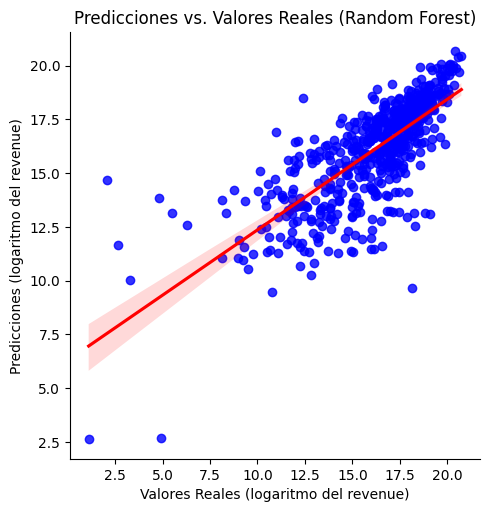


## VI. Conclusiones y futuros pasos

### Análisis de los resultados y fortalezas/debilidades del proyecto
El proyecto ha demostrado la viabilidad de predecir el revenue de las películas usando técnicas de machine learning. Las fortalezas incluyen la capacidad de manejar múltiples variables y la precisión de las predicciones. Las debilidades podrían incluir la dependencia de datos históricos y posibles sesgos en el dataset.

### Propuesta de futuras mejoras y optimizaciones
Para futuros trabajos, se propone:
- Incluir más datos recientes y relevantes
- Explorar técnicas avanzadas como redes neuronales
- Mejorar la imputación de valores faltantes
